# 1. set the environment

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib as plt
#!pip install seaborn==0.9.0 
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History 

#2.  import data

In [0]:
violations=pd.read_csv("gdc.csv")

In [3]:
violations.head()

,Unnamed: 0,Center Name,Legal Name,Building,Maximum Capacity,Day Care ID,Violation Rate Percent,Total Educational Workers,Public Health Hazard Violation Rate,Critical Violation Rate,Inspection Date,Violation Category,Health Code Sub Section,Violation Status,Critical Violation,General Violation,Public Health Hazard,No Violation,SUBSECTION_SIMPLE
0,0,"CENTRAL PARK MONTESSORI, INC.","CENTRAL PARK MONTESSORI, INC.",1,138,DC21252,25.0000,23,0.0000,25.0000,2019-03-20,No_Violation,No_Violation,No_Violation,0,0,0,1,No_Violation
1,1,BUILDING BLOCKS DAY CARE,BUILDING BLOCKS DAY CARE LLC,6810,24,DC31738,40.0000,5,20.0000,40.0000,2016-04-19,CRITICAL,47.33 (b),CORRECTED,1,0,0,0,47.33
2,2,THE WILLIAMSBURG NURSERY SCHOOL,THE WILLIAMSBURG NEIGHBORHOOD NURSERY SCHOOL,54,62,DC21940,60.0000,11,20.0000,60.0000,2016-05-11,PUBLIC HEALTH HAZARD,47.41 (e),CORRECTED,0,0,0,0,47.41
3,3,QUEENS LIBRARY UNIVERSAL PRE-KINDERGARTEN PROG...,QUEENS BOROUGH PUBLIC LIBRARY,85-41,18,DC31867,71.4286,2,14.2857,71.4286,2016-07-20,CRITICAL,47.33 (b),CORRECTED,1,0,0,0,47.33
4,4,ASSOCIATION TO BENEFIT CHILDREN,ASSOCIATION TO BENEFIT CHILDREN,1841,127,DC1135,37.5000,25,25.0000,37.5000,2018-08-30,No_Violation,No_Violation,No_Violation,0,0,0,1,No_Violation


In [4]:
violations=violations.dropna(how="any")
violations.shape

(51156, 19)

# 3. data visualization

## 3.1 visualize features

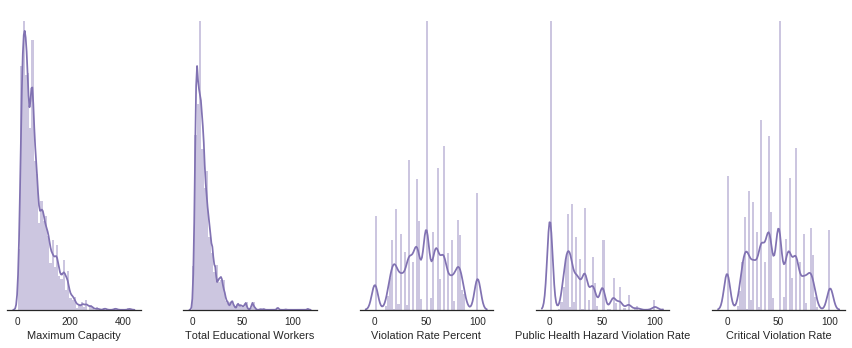

In [52]:
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
f, axes = plt.subplots(1, 5,figsize=(12, 5), sharex=False)
sns.despine(left=True)

sns.distplot(violations["Maximum Capacity"],color="m",ax=axes[0])
sns.distplot(violations["Total Educational Workers"],color="m",ax=axes[1])
sns.distplot(violations["Violation Rate Percent"],color="m",ax=axes[2])
sns.distplot(violations["Public Health Hazard Violation Rate"],color="m",ax=axes[3])
sns.distplot(violations["Critical Violation Rate"],color="m",ax=axes[4])

plt.setp(axes, yticks=[])
plt.tight_layout()

## 3.2 visualize relations between pairs of features

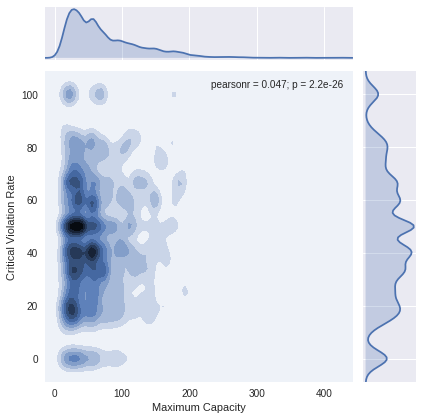

In [7]:
sns.jointplot(x='Maximum Capacity', y='Critical Violation Rate', data=violations, kind='kde')

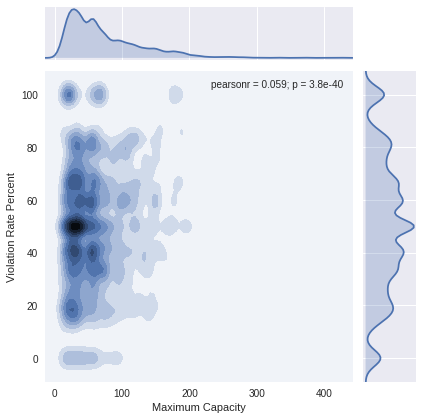

In [12]:
sns.jointplot(x='Maximum Capacity', y='Violation Rate Percent', data=violations, kind='kde')

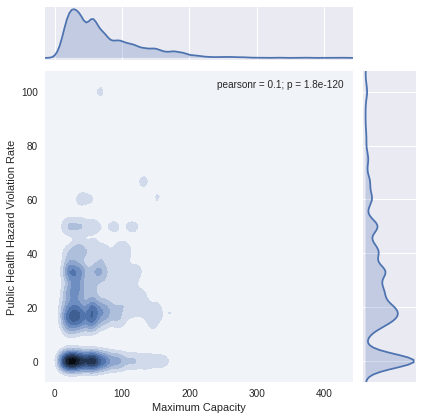

In [8]:
sns.jointplot(x='Maximum Capacity', y='Public Health Hazard Violation Rate', data=violations, kind='kde')

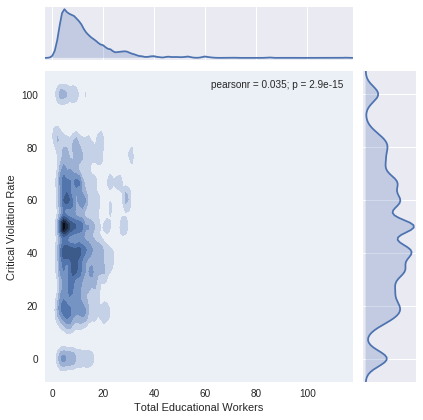

In [10]:
sns.jointplot(x='Total Educational Workers', y='Critical Violation Rate', data=violations, kind='kde')

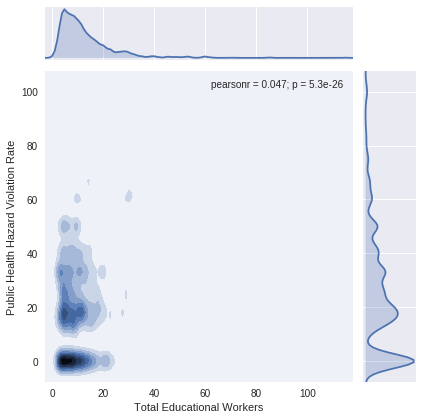

In [11]:
sns.jointplot(x='Total Educational Workers', y='Public Health Hazard Violation Rate', data=violations, kind='kde')

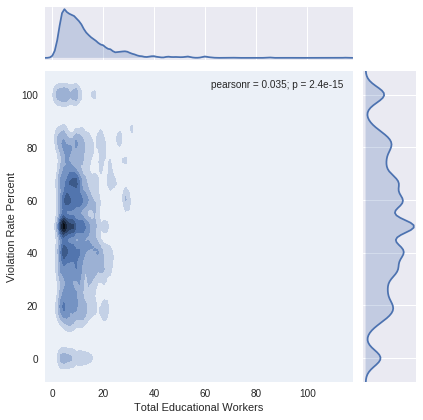

In [13]:
sns.jointplot(x='Total Educational Workers',y='Violation Rate Percent', data=violations, kind='kde')

## 3.3 correlation map

Text(0.5,1,'correlation map')

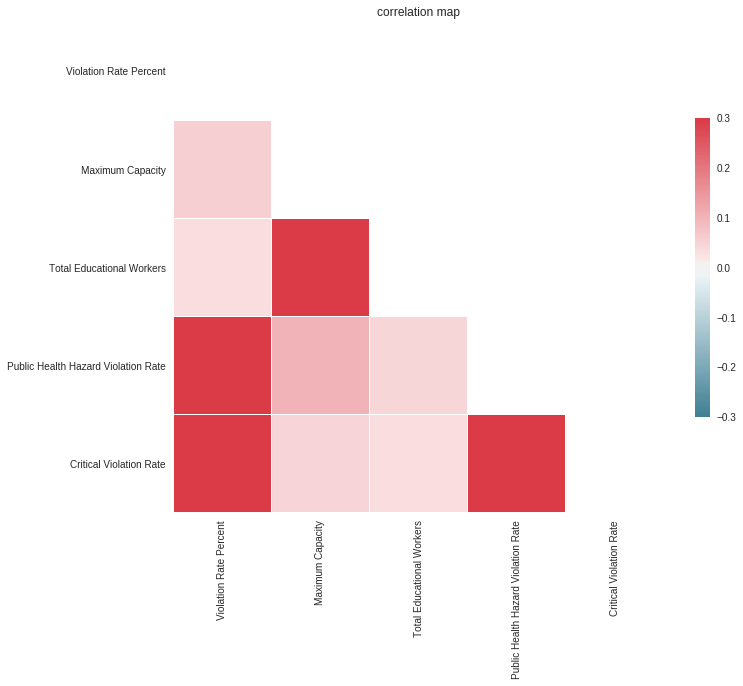

In [54]:
corr =violations[["Violation Rate Percent","Maximum Capacity","Total Educational Workers","Public Health Hazard Violation Rate","Critical Violation Rate"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("correlation map")

# 4. standardize

In [15]:
StandardScaler().fit_transform(violations.loc[:,['Maximum Capacity','Violation Rate Percent','Total Educational Workers','Public Health Hazard Violation Rate','Critical Violation Rate']])
standardized=violations.loc[:,['Maximum Capacity','Violation Rate Percent','Total Educational Workers','Public Health Hazard Violation Rate','Critical Violation Rate']]

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python2.7/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X = standardized.loc[:,['Maximum Capacity','Violation Rate Percent','Total Educational Workers','Public Health Hazard Violation Rate','Critical Violation Rate']]
y =violations.loc[:,['Critical Violation']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# 5. models

## 5.1 random forest

In [25]:
func=rfc()
func.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
print('Accuracy of random forest on training set: {:.2f}'
     .format(func.score(X_train, y_train)))
print('Accuracy of random forest on test set: {:.2f}'
     .format(func.score(X_test, y_test)))

Accuracy of random forest on training set: 0.73
Accuracy of random forest on test set: 0.71


In [27]:
predictions=func.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      9249
           1       0.41      0.11      0.17      3540

   micro avg       0.71      0.71      0.71     12789
   macro avg       0.57      0.52      0.50     12789
weighted avg       0.65      0.71      0.64     12789



In [0]:
features= X
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Get numerical feature importances
importances = list(func.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [30]:
feature_importances

[('Maximum Capacity', 0.35),
 ('Total Educational Workers', 0.22),
 ('Critical Violation Rate', 0.18),
 ('Violation Rate Percent', 0.15),
 ('Public Health Hazard Violation Rate', 0.11)]

## 5.2 decision tree

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on test set: 0.71


In [33]:
predictions=dtc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      9249
           1       0.42      0.08      0.14      3540

   micro avg       0.71      0.71      0.71     12789
   macro avg       0.58      0.52      0.48     12789
weighted avg       0.65      0.71      0.64     12789



## 5.3 svm

In [22]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
print('Accuracy of svm on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of svm on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of svm on training set: 0.73
Accuracy of svm on test set: 0.72


In [24]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      9249
           1       0.44      0.08      0.13      3540

   micro avg       0.72      0.72      0.72     12789
   macro avg       0.58      0.52      0.48     12789
weighted avg       0.65      0.72      0.64     12789



## 5.4 logistic regression

In [18]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logmodel.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logmodel.score(X_test, y_test)))

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Logistic regression classifier on training set: 0.72
Accuracy of Logistic regression classifier on test set: 0.72


In [0]:
from sklearn.metrics import classification_report

In [21]:
predictions=logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      9249
           1       0.50      0.01      0.01      3540

   micro avg       0.72      0.72      0.72     12789
   macro avg       0.61      0.50      0.43     12789
weighted avg       0.66      0.72      0.61     12789



## 5.5 neural network

In [0]:
dataset = violations

In [58]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, :]

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=5, units=5, kernel_initializer="uniform"))
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=3, kernel_initializer="uniform"))
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [0]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
X_val = X_train[:3000]
partial_X_train = X_train[3000:]
y_val = y_train[:3000]
partial_y_train = y_train[3000:]

In [109]:
classifier.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = classifier.fit(partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val))

Train on 35367 samples, validate on 3000 samples
Epoch 1/20
35367/35367 [==============================] - 0s 11us/step - loss: 0.6825 - acc: 0.7180 - val_loss: 0.6720 - val_acc: 0.7260
Epoch 2/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.6612 - acc: 0.7231 - val_loss: 0.6483 - val_acc: 0.7260
Epoch 3/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.6358 - acc: 0.7231 - val_loss: 0.6220 - val_acc: 0.7260
Epoch 4/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.6106 - acc: 0.7231 - val_loss: 0.5990 - val_acc: 0.7260
Epoch 5/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.5912 - acc: 0.7231 - val_loss: 0.5836 - val_acc: 0.7260
Epoch 6/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.5816 - acc: 0.7231 - val_loss: 0.5778 - val_acc: 0.7260
Epoch 7/20
35367/35367 [==============================] - 0s 3us/step - loss: 0.5787 - acc: 0.7231 - val_loss: 0.5758 - val_acc: 0.726

In [115]:
history = classifier.fit(partial_X_train,
partial_y_train,
epochs=600,
batch_size=512,
validation_data=(X_val, y_val))

Train on 35367 samples, validate on 3000 samples
Epoch 1/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5735 - acc: 0.7231 - val_loss: 0.5705 - val_acc: 0.7260
Epoch 2/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5735 - acc: 0.7231 - val_loss: 0.5706 - val_acc: 0.7260
Epoch 3/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5734 - acc: 0.7231 - val_loss: 0.5706 - val_acc: 0.7260
Epoch 4/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5734 - acc: 0.7231 - val_loss: 0.5705 - val_acc: 0.7260
Epoch 5/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5734 - acc: 0.7231 - val_loss: 0.5705 - val_acc: 0.7260
Epoch 6/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5734 - acc: 0.7231 - val_loss: 0.5705 - val_acc: 0.7260
Epoch 7/600
35367/35367 [==============================] - 0s 3us/step - loss: 0.5734 - acc: 0.7231 - val_loss: 0.5706 - val_acc:

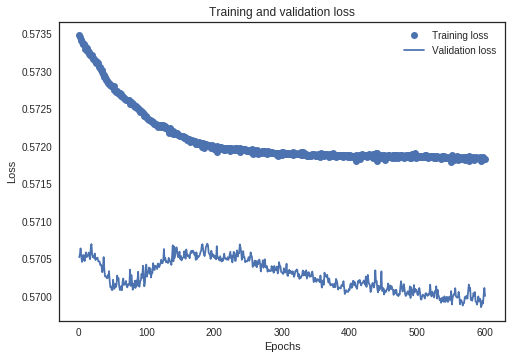

In [116]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

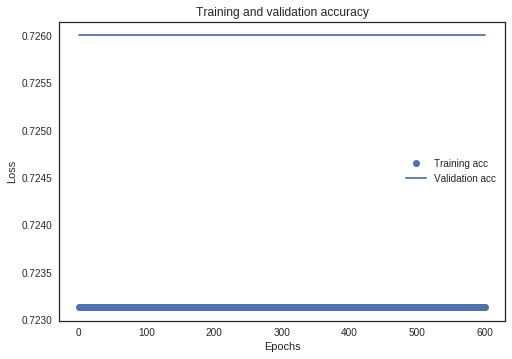

In [117]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()